# Keras tutorial - Emotion Detection in Images of Faces

Welcome to the project. In this project, I :
1. Learnt to use Keras, a high-level neural networks API (programming framework), written in Python and capable of running on top of several lower-level frameworks including TensorFlow and CNTK. 
2. Saw how we could in a couple of hours build a deep learning algorithm.

#### Why are we using Keras? 

* Keras was developed to enable deep learning engineers to build and experiment with different models very quickly. 
* Just as TensorFlow is a higher-level framework than Python, Keras is an even higher-level framework and provides additional abstractions. 
* Being able to go from idea to result with the least possible delay is key to finding good models. 
* However, Keras is more restrictive than the lower-level frameworks, so there are some very complex models that we would still implement in TensorFlow rather than in Keras. 
* That being said, Keras will work fine for many common models. 

* [Keras documentation](https://keras.io/about/)
* [Keras API reference](https://keras.io/api/)

## Load packages
* In this project, I worked on the "Emotion detection" model, which I explained below. 
* Let's load the required packages.

In [1]:
import numpy as np
import keras 
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


**Note**: As we can see, I've imported a lot of functions from Keras. We can use them by calling them directly in Our code. Ex: `X = Input(...)` or `X = ZeroPadding2D(...)`. 

In other words, unlike TensorFlow, We don't have to create the graph and then make a separate `sess.run()` call to evaluate those variables.

## 1 - Emotion Tracking

* A nearby community health clinic is helping the local residents monitor their mental health.  
* As part of their study, They are asking volunteers to record their emotions throughout the day.
* To help the participants more easily track their emotions, I am asked to create an app that will classify their emotions based on some pictures that the volunteers will take of their facial expressions.
* As a proof-of-concept, I first train my model to detect if someone's emotion is classified as "happy" or "not happy."

To build and train this model, I have gathered pictures of some volunteers in a nearby neighborhood. The dataset is labeled.
<img src="images/face_images.png" style="width:550px;height:250px;">

Run the following code to normalize the dataset and learn about its shapes.

In [27]:
#load_datasets
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


**Details of the "Face" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures

## 2 - Building a model in Keras

Keras is very good for rapid prototyping. In just a short time we will be able to build a model that achieves outstanding results.

Here is an example of a model in Keras:

```python
def model(input_shape):
    """
    input_shape: The height, width and channels as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]
    """
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as our input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model.This creates our Keras model instance, I used this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model
```

#### Variable naming convention

* Note that Keras uses a different convention with variable names than I've previously used with numpy and TensorFlow. 
* Instead of creating unique variable names for each step and each layer, such as 
```
X = ...
Z1 = ...
A1 = ...
```
* Keras re-uses and overwrites the same variable at each step:
```
X = ...
X = ...
X = ...
```
* The exception is `X_input`, which we kept separate since it's needed later.

#### Objects as functions
* Notice how there are two pairs of parentheses in each statement.  For example:
```
X = ZeroPadding2D((3, 3))(X_input)
```
* The first is a constructor call which creates an object (ZeroPadding2D).
* In Python, objects can be called as functions. Search for 'python object as function and you can read this blog post [Python Pandemonium](https://medium.com/python-pandemonium/function-as-objects-in-python-d5215e6d1b0d).  See the section titled "Objects as functions."
* The single line is equivalent to this:
```
ZP = ZeroPadding2D((3, 3)) # ZP is an object that can be called as a function
X = ZP(X_input) 
```

**Problem_1**: Implement a `HappyModel()`.  
* This assignment is more open-ended than most. 
* Start by implementing a model using above mention the architecture, and run through the rest of this project using that as our initial model.
* Later, I'll try out other model architectures. 
* For example, I took inspiration from the model above, but then vary the network architecture and hyperparameters however I wish. 
* I will also use other functions such as `AveragePooling2D()`, `GlobalMaxPooling2D()`, `Dropout()`. 

**Note**: Be careful with our data's shapes. Use what I've learned  to make sure my convolutional, pooling and fully-connected layers are adapted to the volumes I'm applying it to.

In [38]:
# FUNCTION: HappyModel

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]


    Returns:
    model -- a Model() instance in Keras
    """
    
    ### IMPORTANT_START CODE HERE ###
    
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as our input image!
    X_input = Input(input_shape)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D(padding = (3,3))(X_input)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(filters = 32, kernel_size = (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = Dropout(rate=0.1, noise_shape=None, seed=None)(X)
    
    # MAXPOOL
    X = MaxPooling2D(pool_size = (2, 2),strides = (2, 2), name = 'max_pool')(X)
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(units = 1, activation = 'sigmoid', name = 'fc')(X) #units: Positive integer, dimensionality of the output space.
    
    #print(X.shape)
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    ### IMPORTANT_END CODE HERE ###
    
    return model

I built a function to describe my model. To train and test this model, there are four steps in Keras:

1. Create the model by calling the function  

2. Compile the model by calling `model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])`  

3. Train the model on train data by calling `model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)`  

4. Test the model on test data by calling `model.evaluate(x = ..., y = ...)`  

If you want to know more about `model.compile()`, `model.fit()`, `model.evaluate()` and their arguments, refer to the official [Keras documentation](https://keras.io/api/models/).

#### Step 1: create the model.  
**NOTE**:  
The `input_shape` parameter is a tuple (height, width, channels).  It excludes the batch number.  
Try `X_train.shape[1:]` as the `input_shape`.

In [39]:
### IMPORTANT_START CODE HERE ### (1 line)
happyModel = HappyModel(X_train.shape[1:])
### IMPORTANT_END CODE HERE ###

#### Step 2: compile the model

**NOTE**:  
Optimizers I try include `'adam'`, `'sgd'` or others.  See the documentation for [optimizers](https://keras.io/optimizers/)  
The "happiness detection" is a binary classification problem.  The loss function that you can use is `'binary_cross_entropy'`.  Note that `'categorical_cross_entropy'` won't work with your data set as its formatted, because the data is an array of 0 or 1 rather than two arrays (one for each category).  Documentation for [losses](https://keras.io/losses/)

In [40]:
### IMPORTANT_START CODE HERE ### (1 line)
happyModel.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
### IMPORTANT_END CODE HERE ###

#### Step 3: train the model

**Suggestion**:  
Use the `'X_train'`, `'Y_train'` variables.  Use integers for the epochs and batch_size

**Note**: If you run `fit()` again, the `model` will continue to train with the parameters it has already learned instead of reinitializing them.

In [46]:
### IMPORTANT_START CODE HERE ### (1 line)
history_dropout = happyModel.fit(x=X_train, y=Y_train, batch_size=16, epochs=30, validation_split = 0.1, shuffle = True)
### IMPORTANT_END CODE HERE###

Train on 540 samples, validate on 60 samples
Epoch 1/30
540/540 [==============================] - 3s 6ms/step - loss: 0.0737 - accuracy: 0.9759 - val_loss: 0.0355 - val_accuracy: 0.9833
Epoch 2/30
540/540 [==============================] - 3s 6ms/step - loss: 0.0805 - accuracy: 0.9741 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 3/30
540/540 [==============================] - 4s 7ms/step - loss: 0.1079 - accuracy: 0.9778 - val_loss: 0.0993 - val_accuracy: 0.9667
Epoch 4/30
540/540 [==============================] - 3s 6ms/step - loss: 0.1145 - accuracy: 0.9648 - val_loss: 0.4302 - val_accuracy: 0.8333
Epoch 5/30
540/540 [==============================] - 3s 6ms/step - loss: 0.0444 - accuracy: 0.9833 - val_loss: 0.7072 - val_accuracy: 0.7500
Epoch 6/30
540/540 [==============================] - 3s 6ms/step - loss: 0.0561 - accuracy: 0.9870 - val_loss: 0.0703 - val_accuracy: 0.9667
Epoch 7/30
540/540 [==============================] - 3s 6ms/step - loss: 0.0460 - accuracy: 0.9889 - v

## LOSSES PER EPOCHS

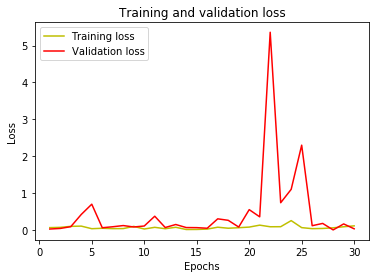

In [50]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### ACCURACY PER EPOCHS

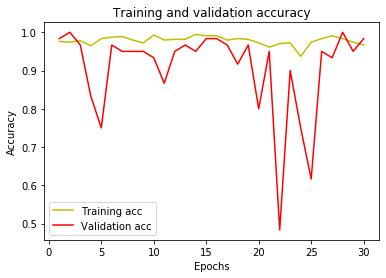

In [51]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Step 4: evaluate model  
**Hint**:  
Use the `'X_test'` and `'Y_test'` variables to evaluate the model's performance.

In [52]:
### IMPORTANT_START CODE HERE ### (1 line)
preds = happyModel.evaluate(x=X_test, y=Y_test)
### IMPORTANT_END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 0s 2ms/step

Loss = 0.107040200928847
Test Accuracy = 0.95333331823349


#### Expected performance   
If your `happyModel()` function worked, its accuracy should be better than random guessing (50% accuracy).

To give you a point of comparison, our model gets around **95% test accuracy in 40 epochs** (and 99% train accuracy) with a mini batch size of 16 and "adam" optimizer.

#### Tips for improving model

If we have not achieved a very good accuracy (>= 80%), here are some things tips:

- Use blocks of CONV->BATCHNORM->RELU such as:
```python
X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
X = BatchNormalization(axis = 3, name = 'bn0')(X)
X = Activation('relu')(X)
```
until our height and width dimensions are quite low and our number of channels quite large (≈32 for example).  
We can then flatten the volume and use a fully-connected layer.
- Use MAXPOOL after such blocks.  It will help to lower the dimension in height and width.
- Change optimizer. I find 'adam' works well. 
- If we get memory issues, lower our batch_size (e.g. 12 )
- Run more epochs until we see the train accuracy no longer improves. 

**Note**: If we perform hyperparameter tuning on our model, the test set actually becomes a dev set, and our model might end up overfitting to the test (dev) set. Normally, We want to separate dev and test sets.The dev set is used for parameter tuning, and the test set is used once to estimate the model's performance in production.

## 3 - Conclusion

Now, I have created a proof of concept for "happiness detection"!

## Key Points to remember
- Keras is a tool we recommend for rapid prototyping. It allows to quickly try out different model architectures.
- Remember The four steps in Keras: 


1. Create  
2. Compile  
3. Fit/Train  
4. Evaluate/Test  

## 4 - Test with Unseen  image

I now take a picture of someone face and see if it can classify whether The expression is "happy" or "not happy". To do that:


The training/test sets were quite similar; for example, all the pictures were taken against the same background (since a front door camera is always mounted in the same position). This makes the problem easier, but a model trained on this data may or may not work on our own data. But I feel free to give it a try! 

[[0.]]


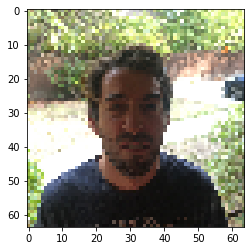

In [53]:
### IMPORTANT_START CODE HERE ###
img_path = 'images/my_image.jpg'
### IMPORTANT_END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))

## 5 - Other useful functions in Keras 

Two other basic features of Keras that I find useful are:
- `model.summary()`: prints the details of our layers in a table with the sizes of its inputs/outputs
- `plot_model()`: plots our graph in a nice layout. We can even save it as ".png" using SVG() if we'd like to share it on social media ;). 

Run the following code.

In [54]:
happyModel.summary()

Model: "HappyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_10 (ZeroPaddi (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0

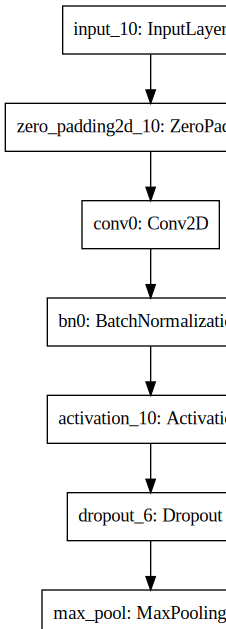

In [55]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))